In [ ]:
!mkdir datasets
!mkdir datasets/dog
!mkdir datasets/cat

mkdir: cannot create directory ‘datasets’: File exists
mkdir: cannot create directory ‘datasets/dog’: File exists
mkdir: cannot create directory ‘datasets/cat’: File exists


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import os
import cv2

In [ ]:
folder_path = '/content/datasets/'
os.listdir(folder_path)

['cat', 'dog']

In [ ]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = '/content/datasets/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'cat': ['/content/datasets/cat/cat_0_5767.jpg',
  '/content/datasets/cat/cat_0_238.jpg',
  '/content/datasets/cat/cat_0_1514.jpg',
  '/content/datasets/cat/cat1.jpg',
  '/content/datasets/cat/cat_0_5405.jpg',
  '/content/datasets/cat/cat_0_4667.jpg',
  '/content/datasets/cat/cat_0_9714.jpg',
  '/content/datasets/cat/cat_0_4433.jpg',
  '/content/datasets/cat/cat3.jpg',
  '/content/datasets/cat/cat_0_7621.jpg',
  '/content/datasets/cat/cat_0_1344.jpg',
  '/content/datasets/cat/cat2.jpg'],
 'dog': ['/content/datasets/dog/dog2.jpg',
  '/content/datasets/dog/dog_0_6034.jpg',
  '/content/datasets/dog/dog_0_2029.jpg',
  '/content/datasets/dog/dog1.jpg',
  '/content/datasets/dog/dog_0_7107.jpg',
  '/content/datasets/dog/dog_0_4810.jpg',
  '/content/datasets/dog/dog_0_9135.jpg',
  '/content/datasets/dog/dog_0_2770.jpg',
  '/content/datasets/dog/dog3.jpg',
  '/content/datasets/dog/dog_0_7338.jpg',
  '/content/datasets/dog/.ipynb_checkpoints',
  '/content/datasets/dog/dog_0_7945.jpg',
  '/conten

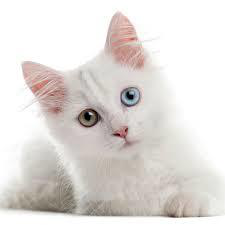

In [ ]:
img = load_img('/content/datasets/cat/cat1.jpg')
img

In [ ]:
x = img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
import pandas as pd

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
mem_usage(x)

AttributeError: ignored

In [ ]:
x.shape

(225, 225, 3)

In [ ]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 225, 225, 3)

In [ ]:
x_datasets, y_datasets = [], []

label2index = {'cat' : 1, 'dog' : 0}

for label, filenames in dataset.items():
    for filename in filenames:
        # img를 array 형태로 변경
        image = cv2.imread(filename)
        resize = lambda x: tf.image.resize(x, (224, 224))
        image = resize(image)
        x_datasets.append(image)

        # label을 index로 변경
        y_datasets.append(label2index[label])
x_datasets, y_datasets

ValueError: ignored

In [ ]:
x_datasets = np.array(x_datasets)
y_datasets = np.array(y_datasets)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40, # 회전 범위
        width_shift_range=0.2, # 너비 이동 범위(비중)
        height_shift_range=0.2, # 높이 이동 범위(비중)
        shear_range=0.2, # 전단 강도 범위(밀림 ; 반시계방향 )
        zoom_range=0.2, # 확대 축소 범위
        horizontal_flip=True, # 수평 뒤집기
        vertical_flip=True # 수직 뒤집기
        )

In [ ]:
folder_path

'/content/datasets/'

In [ ]:
for label in  os.listdir(folder_path):
    # ex) label_path = /content/datasets/cat 또는 /content/datasets/dog
    label_path = folder_path + '/' + label + '/'
    for filename in os.listdir(label_path): # ex)= [cat1.jpg, cat2.jpg, cat3.jpg] 또는  = [dog1.jpg, dog2.jpg, dog3.jpg]
        # filename = cat1.jpg -> cat2.jpg -> cat3.jpg
        filepath = label_path + filename

        img = load_img(filepath)
        # img 출력
        # plt.imshow(img)
        # break
        x = img_to_array(img)
        # x.shape 출력
        # print(x.shape)
        # break
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir=label_path, save_prefix=label, save_format='jpg'):
            i += 1
            if i > 2:
                break  

IsADirectoryError: ignored